
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

In [4]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [5]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [6]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [7]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [8]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [9]:
alpha = 0.05

Para poder calcular el intervalo de confianza entre la media de dos muestras se debe cumplir lo siguiente:

1. Ambas poblaciones deben tener una distribución nomrmal o simil normal
2. Ambas poblaciones deben tener varianza diferente 
3. Se deben tomar una muestra de cada poblacion y cada muestra debe ser independiente

In [10]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

muestra_hombre = df[(df.salary_monthly_NETO > 1000) & is_man]
muestra_no_hombre = df[(df.salary_monthly_NETO > 1000) & ~is_man]

In [11]:
import statistics

In [12]:
groupA.isna().sum()

0

In [54]:
groupB.isna().sum()

0

In [56]:
groupAVar = statistics.pvariance(groupA)
groupBVar = statistics.pvariance(groupB)

print (f" GroupA Var {groupAVar} GroupB Var {groupBVar}")

 GroupA Var 10445798632.50067 GroupB Var 3190397506.1833463


In [60]:
import scipy
alpha = 0.05 / 2
#H0 varianzas iguales
(_, pvalue) = scipy.stats.levene(groupA, groupB)
print (f" Se  {'Rechaza' if pvalue < alpha else 'Acepta'} H0 (Varianzas Iguales), pvalue = {pvalue} ")

 Se  Rechaza H0 (Varianzas Iguales), pvalue = 1.3285372646647198e-06 


In [14]:
#!conda install -y -c  conda-forge statsmodels

In [63]:
diferencia_medias = statistics.mean(groupA) - statistics.mean(groupB)

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [64]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(groupA.values), sms.DescrStatsW(groupB.values))
cm.tconfint_diff(usevar='unequal')
li,ls = cm.tconfint_diff(usevar='unequal' , alpha =alpha )
print (f"Asumiendo varianzas distintas (se asume esto por prueba de hipotesis usando metodo scipy.stats.levene)")
print (f"Diferencia medias: {diferencia_medias}")
print (f"Intervalo de confianza : ({li},{ls})" )



# Referencia paquete python https://stackoverflow.com/questions/31768464/confidence-interval-for-t-test-difference-between-means-in-python
# Referencia teoria https://www.youtube.com/watch?v=YIImQIRDGMg

Asumiendo varianzas distintas (se asume esto por prueba de hipotesis usando metodo scipy.stats.levene)
Diferencia medias: 23262.373399918186
Intervalo de confianza : (17881.75892729061,28642.987872545702)


In [66]:

# Esto no iria debido a que las varianzas son diferentes

#cm = sms.CompareMeans(sms.DescrStatsW(groupA.values), sms.DescrStatsW(groupB.values))
#cm.tconfint_diff(usevar='pooled')
#li,ls = cm.tconfint_diff(usevar='pooled' , alpha =alpha )
#print (f"Asumiendo varianzas iguales")
#print (f"Diferencia medias: {diferencia_medias}")
#print (f"Intervalo de confianza : ({li},{ls})" )


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


https://www.youtube.com/watch?v=ZO2RmSkXK3c este test permite determinar si las muestas provienen de la misma distribución. Para ello buscar la mayor diferencia entre la funcion acumulativa de distribucion de ambas muestras.

Como dibujar la funcion acumultiva de destribucion CDF (comulative distribution function)



### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [81]:
import numpy as np
countA, bins_countA = np.histogram(groupA, bins=100)
countB, bins_countB = np.histogram(groupB, bins=100)

In [82]:
pdfA = countA / sum(countA)
pdfB = countB / sum(countB)

In [83]:
cdfA = np.cumsum(pdfA)
cdfB = np.cumsum(pdfB)

In [84]:
cdfB

array([0.003367  , 0.01683502, 0.03142536, 0.07631874, 0.18181818,
       0.2704826 , 0.38608305, 0.48035915, 0.55780022, 0.64758698,
       0.70707071, 0.77777778, 0.83164983, 0.8630752 , 0.89337823,
       0.90909091, 0.93041526, 0.94163861, 0.95398429, 0.95847363,
       0.96632997, 0.96969697, 0.97194164, 0.97418631, 0.98092031,
       0.98204265, 0.98204265, 0.98204265, 0.98316498, 0.98316498,
       0.98316498, 0.98428732, 0.98653199, 0.98877666, 0.98989899,
       0.98989899, 0.98989899, 0.99102132, 0.99214366, 0.99326599,
       0.99326599, 0.99326599, 0.99438833, 0.99438833, 0.99438833,
       0.99438833, 0.99438833, 0.99551066, 0.99551066, 0.996633  ,
       0.996633  , 0.996633  , 0.996633  , 0.996633  , 0.996633  ,
       0.99775533, 0.99775533, 0.99775533, 0.99775533, 0.99775533,
       0.99775533, 0.99775533, 0.99775533, 0.99775533, 0.99775533,
       0.99775533, 0.99775533, 0.99775533, 0.99775533, 0.99775533,
       0.99775533, 0.99775533, 0.99775533, 0.99775533, 0.99775

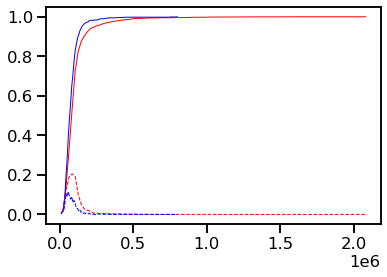

In [74]:
# Graficamos la función de distribución acumulado CDF y la la función de densidad PDF.

plt.plot(bins_countA[1:], cdfA, label="CDF" , color="red" , linewidth="1")
plt.plot(bins_countB[1:], cdfB, label="CDF" , color="blue" , linewidth="1")

plt.plot(bins_countA[1:], pdfA, color="red", label="PDF", linestyle="dashed" , linewidth="1")
plt.plot(bins_countB[1:], pdfB, color="blue", label="PDF", linestyle="dashed" , linewidth="1")

In [49]:
from scipy.stats import ks_2samp

In [76]:
(_ , pvalue) = ks_2samp(groupA, groupB)
alpha = 0.05/2

print (f" Se  {'Rechaza' if pvalue < alpha else 'Acepta'} H0 (misma distribución) , pvalue = {pvalue} ")
#https://stackoverflow.com/questions/10884668/two-sample-kolmogorov-smirnov-test-in-python-scipy

#https://sparky.rice.edu//astr360/kstest.pdf

# Como calcular el critical value
#https://www.real-statistics.com/non-parametric-tests/goodness-of-fit-tests/two-sample-kolmogorov-smirnov-test/

 Se  Rechaza H0 (misma distribución) , pvalue = 1.5432100042289676e-14 


In [53]:
#El pvalue es muy chico, con lo cual rechazamos que las muestras provienen de la misma distribución

![tt](images/kolmogorov-Smirnov-test.png)

Estadistico seleccionado: No parametrico, se usa la máxima diferencia entre las funciones de distribución acumuladas

$H_0$=Las dos muestras tienen la misma distribución


In [77]:
alpha = 0.05 / 2
#Controlar que el test sea doble cola

In [80]:
(_,pvalue) = scipy.stats.ttest_ind(groupA, groupB , equal_var=False)

print (f" Se  {'Rechaza' if pvalue < alpha else 'Acepta'} H0 (misma distribución), pvalue = {pvalue} ")



 Se  Rechaza H0 (misma distribución), pvalue = 8.605197322133209e-22 


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [86]:
from statsmodels.stats.power import tt_ind_solve_power

In [87]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [90]:
 for x in range(80,100,5):
    result = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=x/100, ratio=ratio)
    print (result)

298.3073379956589
341.0013436655071
398.7961001403289
492.8117730249174


In [96]:

print (f"GroupB {len(groupB)} GroupA {len(groupA)} Ration {ratio}")


GroupB 891 GroupA 4815 Ration 0.18504672897196262


## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
